In [9]:
from qiskit.circuit.library import CPhaseGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile
import numpy as np

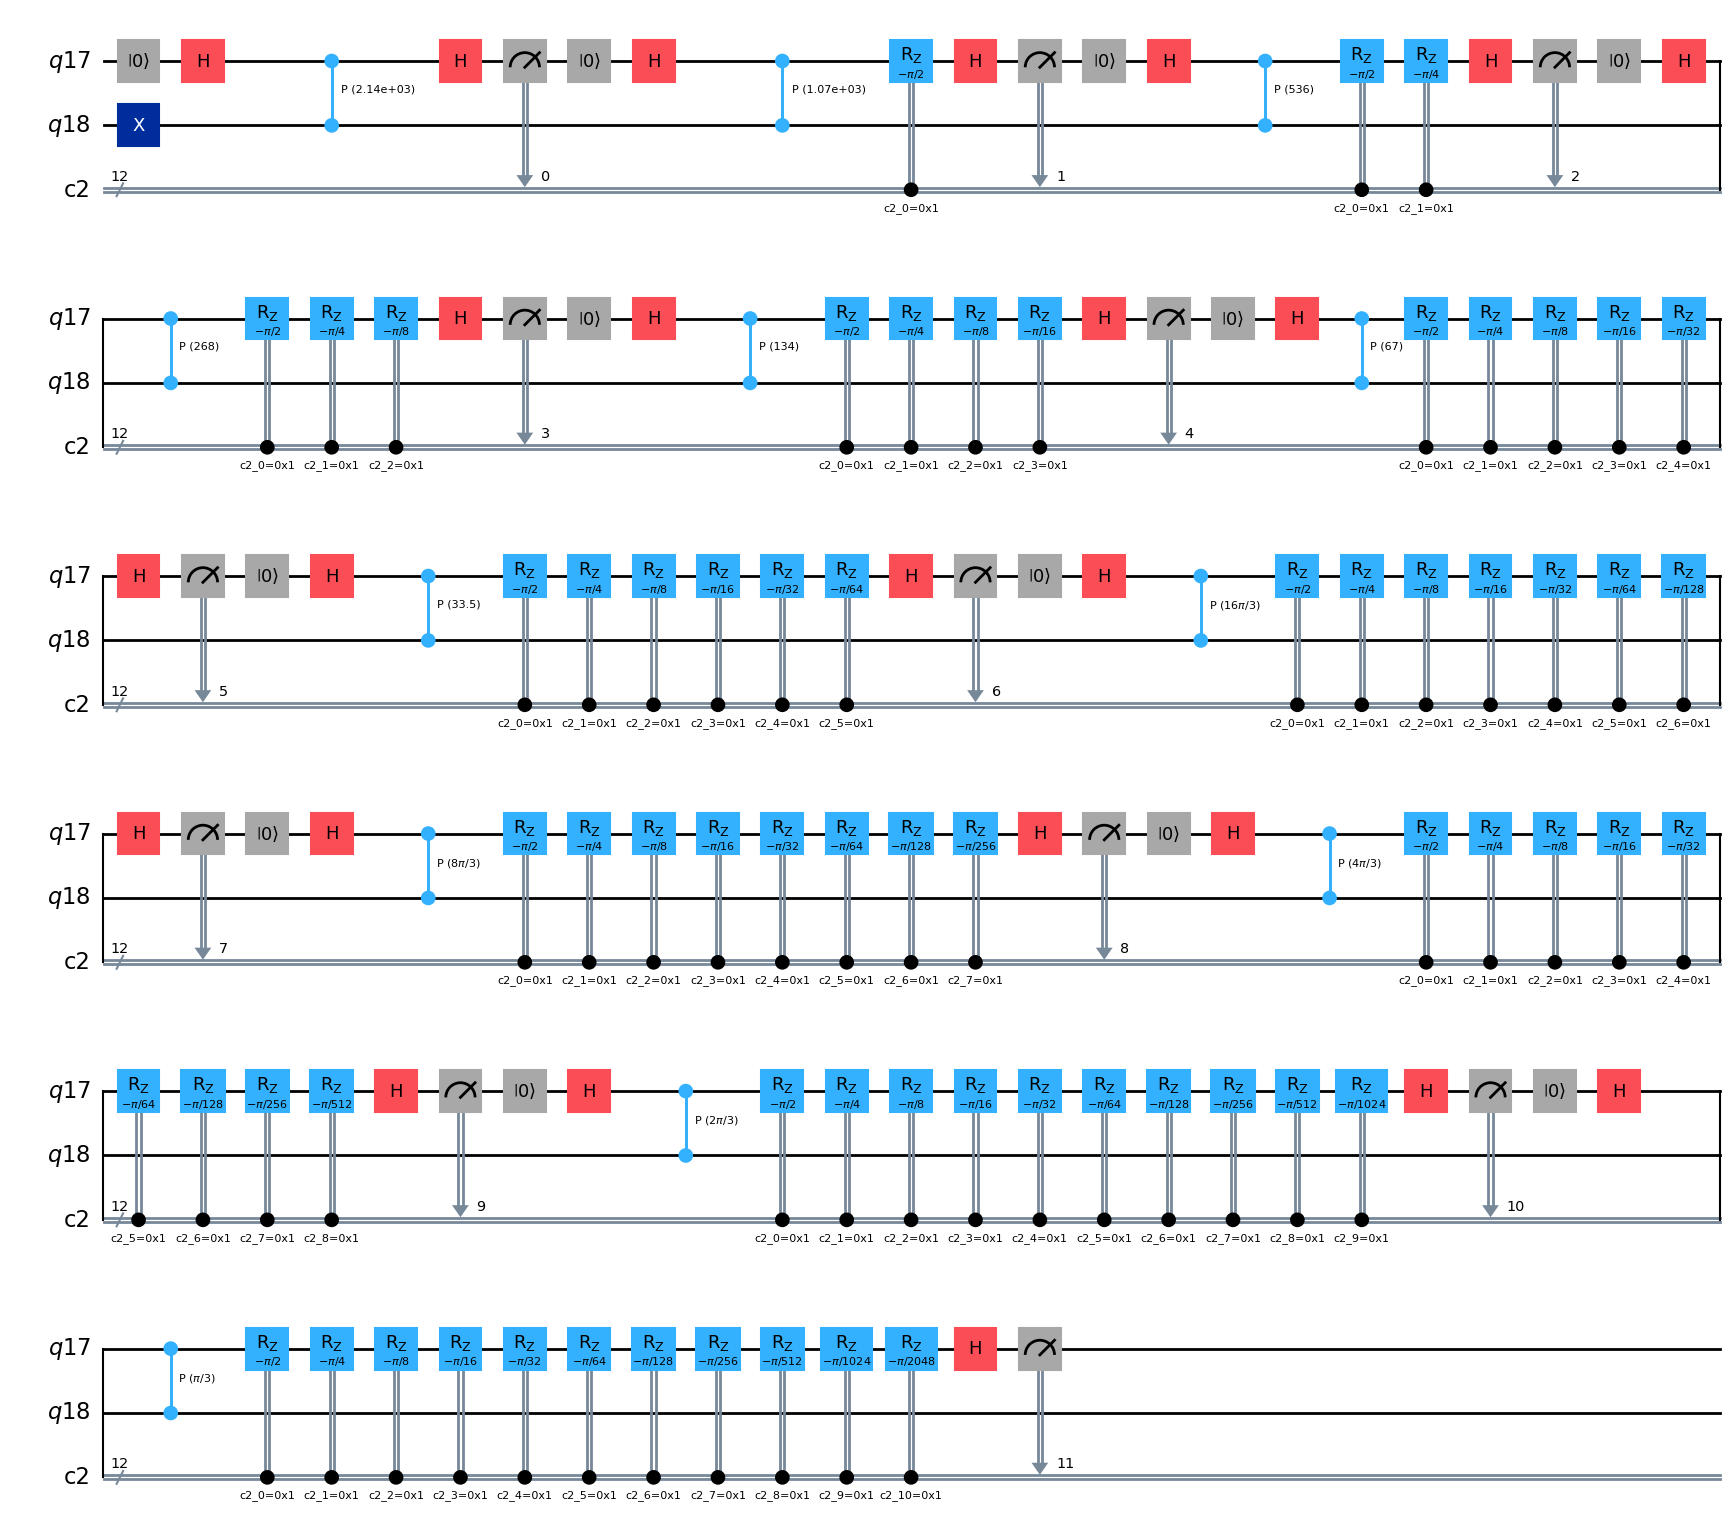

In [10]:
# theta belongs to [0, 1)
# the approximation is taken modulo 1
#   if theta is 1 the approximation is 0
theta = 1 / 6
U = CPhaseGate(2 * np.pi * theta)

m = 12
aqreg = QuantumRegister(1)
sqreg = QuantumRegister(1)
creg = ClassicalRegister(m)
qc = QuantumCircuit(aqreg, sqreg, creg)
qc.x(sqreg)  # eigenstate of the phase gate

for i in range(m):
    qc.reset(aqreg)
    qc.h(aqreg)
    qc.append(U.power(2 ** (m - i - 1)), [aqreg[0], sqreg[0]])
    factor = 4
    for j in range(i):
        w = -2 * np.pi / factor
        qc.rz(w, aqreg[0]).c_if(creg[j], 1)
        factor *= 2
    qc.h(aqreg)
    qc.measure(aqreg, creg[i])

qc.draw(output="mpl")

In [11]:
simulator = AerSimulator()
transpiled_qc = transpile(qc, simulator)
job = simulator.run(transpiled_qc, shots=1024)
counts = job.result().get_counts()

In [12]:
# phase estimation
highest_probability_outcome = max(counts, key=counts.get)
print("Measured:", highest_probability_outcome)
result = int(highest_probability_outcome, 2) / 2**m
print("Using %d qubits with theta = %.5f, estimated_theta = %.5f." % (m, theta, result))

Measured: 001010101110
Using 12 qubits with theta = 0.16667, estimated_theta = 0.16748.
